**Title: Exploring the Gender Pay Gap in the Tech Industry: A Data Analytics Investigation**

**Introduction:**

In an era of progress and inclusivity, it is imperative to address disparities that persist in various professional domains. Our data analytics project embarks on a comprehensive examination of the gender pay gap within the tech industry. Through rigorous analysis of a Kaggle survey dataset, we aim to uncover the multifaceted factors that contribute to income inequality between men and women.

Our investigation begins with a meticulous time series analysis, charting the evolution of median salaries across different countries from 2020 to 2022. Our primary objective is to discern if there have been changes in gender-based pay disparities within these temporal shifts.

Furthermore, we scrutinize the intricate interplay between salary and gender, dissecting it by various aspects of qualification.  This nuanced examination aims to shed light on the reasons behind the pay gap in this field and explore any potential connections to qualifications.


Our journey through this data analytics project not only seeks to quantify the gender pay gap but also to uncover the underlying dynamics that perpetuate this inequality. By doing so, we hope to contribute to the ongoing dialogue on gender equity in the workplace and pave the way for informed decisions that promote fairness and inclusivity.

milestone 1
this notebook: https://colab.research.google.com/drive/19ZOQT7TeoHIirOpdXQFlj1SSmR20VzDN?usp=sharingmm
doc: https://docs.google.com/document/d/1NC1skksG7yFJ3AgZ9ao0GusE6gEB6N4aTBoSAX1vBrQ/edit
folder: https://drive.google.com/drive/folders/1hx8ADybfcpr_UE4YVC7xLfNOzo_2DIXq?usp=drive_link

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_2020 = pd.read_csv('/content/drive/MyDrive/Nus/course material/it5006: da/project/data source/kaggle_survey_2020_responses.csv', low_memory = False)
df_2021 = pd.read_csv('/content/drive/MyDrive/Nus/course material/it5006: da/project/data source/kaggle_survey_2021_responses.csv', low_memory = False)
df_2022 = pd.read_csv('/content/drive/MyDrive/Nus/course material/it5006: da/project/data source/kaggle_survey_2022_responses.csv', low_memory = False)

##Get the data (must run)

In [ ]:
# Get the questions' titles
question_title_2020 =  df_2020[0:1]
question_title_2021 =  df_2021[0:1]
question_title_2022 =  df_2022[0:1]

# add year column
df_2020['year'] = 2020
df_2021['year'] = 2021
df_2022['year'] = 2022

# # remove the first row, which is the question row
df_2020 = df_2020.iloc[1:]
df_2021 = df_2021.iloc[1:]
df_2022 = df_2022.iloc[1:]

In [ ]:
df_2020.shape[0], df_2021.shape[0],df_2022.shape[0]

(20036, 25973, 23997)

### construct the combined dataset

In [ ]:
data = pd.DataFrame()
data['completion_time'] = pd.concat([df_2020['Time from Start to Finish (seconds)'], df_2021['Time from Start to Finish (seconds)'], df_2022['Duration (in seconds)']]).astype('int')
data['year'] = pd.concat([df_2020['year'], df_2021['year'], df_2022['year']])
data['age'] = pd.concat([df_2020['Q1'], df_2021['Q1'], df_2022['Q2']])
data['gender'] = pd.concat([df_2020['Q2'], df_2021['Q2'], df_2022['Q3']])
data['region'] = pd.concat([df_2020['Q3'], df_2021['Q3'], df_2022['Q4']])
data['highest_edu_lv'] = pd.concat([df_2020['Q4'], df_2021['Q4'], df_2022['Q8']]) #What is the highest level of formal education that you have attained or plan to attain within the next 2 years?

#occupation
data['role_title'] = pd.concat([df_2020['Q5'], df_2021['Q5'], df_2022['Q23']]) # Select the title most similar to your current role (or most recent title if retired): - Selected Choice
data['salary'] = pd.concat([df_2020['Q24'], df_2021['Q25'], df_2022['Q29']]) #What is your current yearly compensation (approximate $USD)?
data['company_size'] = pd.concat([df_2020['Q20'], df_2021['Q21'], df_2022['Q25']]) #What is the size of the company where you are employed?
#data['industry'] = pd.concat([df_2020['Q19'], df_2021['Q20'], df_2022['Q24']]) #2020 no data
  #important activity
data['do_analyze_data'] = pd.concat([df_2020['Q23_Part_1'], df_2021['Q24_Part_1'], df_2022['Q28_1']]).fillna(0).astype(bool).astype(int)
data['do_build_data_infra'] = pd.concat([df_2020['Q23_Part_2'], df_2021['Q24_Part_2'], df_2022['Q28_2']]).fillna(0).astype(bool).astype(int)
data['do_build_ml_prototypes'] = pd.concat([df_2020['Q23_Part_3'], df_2021['Q24_Part_3'], df_2022['Q28_3']]).fillna(0).astype(bool).astype(int)
data['do_build_ml_service'] = pd.concat([df_2020['Q23_Part_4'], df_2021['Q24_Part_4'], df_2022['Q28_4']]).fillna(0).astype(bool).astype(int)
data['do_experiment_ml_models'] = pd.concat([df_2020['Q23_Part_5'], df_2021['Q24_Part_5'], df_2022['Q28_5']]).fillna(0).astype(bool).astype(int)
data['do_ml_research'] = pd.concat([df_2020['Q23_Part_6'], df_2021['Q24_Part_6'], df_2022['Q28_6']]).fillna(0).astype(bool).astype(int)
data['do_none'] = pd.concat([df_2020['Q23_Part_7'], df_2021['Q24_Part_7'], df_2022['Q28_7']]).fillna(0).astype(bool).astype(int)
data['do_other'] = pd.concat([df_2020['Q23_OTHER'], df_2021['Q24_OTHER'], df_2022['Q28_8']]).fillna(0).astype(bool).astype(int)

# programming skill
data['year_of_coding'] = pd.concat([df_2020['Q6'], df_2021['Q6'], df_2022['Q11']])
  # programming language
data['use_python'] = pd.concat([df_2020['Q7_Part_1'], df_2021['Q7_Part_1'], df_2022['Q12_1']]).fillna(0).astype(bool).astype(int)
data['use_r'] = pd.concat([df_2020['Q7_Part_2'], df_2021['Q7_Part_2'], df_2022['Q12_2']]).fillna(0).astype(bool).astype(int)
data['use_sql'] = pd.concat([df_2020['Q7_Part_3'], df_2021['Q7_Part_3'], df_2022['Q12_3']]).fillna(0).astype(bool).astype(int)
data['use_c'] = pd.concat([df_2020['Q7_Part_4'], df_2021['Q7_Part_4'], df_2022['Q12_4']]).fillna(0).astype(bool).astype(int)
data['use_python'] = pd.concat([df_2020['Q7_Part_1'], df_2021['Q7_Part_1'], df_2022['Q12_1']]).fillna(0).astype(bool).astype(int)
data['use_c++'] = pd.concat([df_2020['Q7_Part_5'], df_2021['Q7_Part_5'], df_2022['Q12_6']]).fillna(0).astype(bool).astype(int)
data['use_java'] = pd.concat([df_2020['Q7_Part_6'], df_2021['Q7_Part_6'], df_2022['Q12_7']]).fillna(0).astype(bool).astype(int)
data['use_javascript'] = pd.concat([df_2020['Q7_Part_7'], df_2021['Q7_Part_7'], df_2022['Q12_8']]).fillna(0).astype(bool).astype(int)
data['use_julia'] = pd.concat([df_2020['Q7_Part_8'], df_2021['Q7_Part_8'], df_2022['Q12_9']]).fillna(0).astype(bool).astype(int)
data['use_bash'] = pd.concat([df_2020['Q7_Part_10'], df_2021['Q7_Part_10'], df_2022['Q12_9']]).fillna(0).astype(bool).astype(int)
data['use_matlab'] = pd.concat([df_2020['Q7_Part_11'], df_2021['Q7_Part_11'], df_2022['Q12_11']]).fillna(0).astype(bool).astype(int)
data['use_none'] = pd.concat([df_2020['Q7_Part_12'], df_2021['Q7_Part_12'], df_2022['Q12_14']]).fillna(0).astype(bool).astype(int)
data['use_other'] = pd.concat([df_2020['Q7_OTHER'], df_2021['Q7_OTHER'], df_2022['Q12_15']]).fillna(0).astype(bool).astype(int)

# ML skill
data['year_of_ml'] = pd.concat([df_2020['Q15'], df_2021['Q15'], df_2022['Q16']]) #For how many years have you used machine learning methods?
  #ML framework
data['ml_use_scikit_learn'] = pd.concat([df_2020['Q16_Part_1'], df_2021['Q16_Part_1'], df_2022['Q17_1']]).fillna(0).astype(bool).astype(int)
data['ml_use_tensorflow'] = pd.concat([df_2020['Q16_Part_2'], df_2021['Q16_Part_2'], df_2022['Q17_2']]).fillna(0).astype(bool).astype(int)
data['ml_use_keras'] = pd.concat([df_2020['Q16_Part_3'], df_2021['Q16_Part_3'], df_2022['Q17_3']]).fillna(0).astype(bool).astype(int)
data['ml_use_pytorch'] = pd.concat([df_2020['Q16_Part_4'], df_2021['Q16_Part_4'], df_2022['Q17_4']]).fillna(0).astype(bool).astype(int)
data['ml_use_fastai'] = pd.concat([df_2020['Q16_Part_5'], df_2021['Q16_Part_5'], df_2022['Q17_5']]).fillna(0).astype(bool).astype(int)
data['ml_use_xgboost'] = pd.concat([df_2020['Q16_Part_7'], df_2021['Q16_Part_7'], df_2022['Q17_6']]).fillna(0).astype(bool).astype(int)
data['ml_use_lightgbm'] = pd.concat([df_2020['Q16_Part_8'], df_2021['Q16_Part_8'], df_2022['Q17_7']]).fillna(0).astype(bool).astype(int)
data['ml_use_catboost'] = pd.concat([df_2020['Q16_Part_9'], df_2021['Q16_Part_9'], df_2022['Q17_8']]).fillna(0).astype(bool).astype(int)
data['ml_use_caret'] = pd.concat([df_2020['Q16_Part_12'], df_2021['Q16_Part_12'], df_2022['Q17_9']]).fillna(0).astype(bool).astype(int)
data['ml_use_tidymodels'] = pd.concat([df_2020['Q16_Part_13'], df_2021['Q16_Part_13'], df_2022['Q17_10']]).fillna(0).astype(bool).astype(int)
data['ml_use_jax'] = pd.concat([df_2020['Q16_Part_14'], df_2021['Q16_Part_14'], df_2022['Q17_11']]).fillna(0).astype(bool).astype(int)
#data['ml_use_pytorch_lightning'] = pd.concat([df_2020['Q16_Part_15'], df_2021['Q16_Part_15'], df_2022['Q17_12']]).fillna(0).astype(bool).astype(int)
# data['ml_use_huggingface'] = pd.concat([df_2020[''], df_2021['Q16_Part_16'], df_2022['Q17_13']]).fillna(0).astype(bool).astype(int)
data['ml_use_none'] = pd.concat([df_2020['Q16_Part_15'], df_2021['Q16_Part_17'], df_2022['Q17_14']]).fillna(0).astype(bool).astype(int)
data['ml_use_other'] = pd.concat([df_2020['Q16_OTHER'], df_2021['Q16_OTHER'], df_2022['Q17_15']]).fillna(0).astype(bool).astype(int)

data

,completion_time,year,age,gender,region,highest_edu_lv,role_title,salary,company_size,do_analyze_data,...,ml_use_pytorch,ml_use_fastai,ml_use_xgboost,ml_use_lightgbm,ml_use_catboost,ml_use_caret,ml_use_tidymodels,ml_use_jax,ml_use_none,ml_use_other
1,1838,2020,35-39,Man,Colombia,Doctoral degree,Student,NaN,NaN,0,...,0,0,1,0,0,0,0,0,0,0
2,289287,2020,30-34,Man,United States of America,Master’s degree,Data Engineer,"100,000-124,999","10,000 or more employees",1,...,1,0,0,0,0,0,0,0,0,0
3,860,2020,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,"15,000-19,999","1000-9,999 employees",0,...,0,0,0,0,0,0,0,0,0,0
4,507,2020,30-34,Man,United States of America,Master’s degree,Data Scientist,"125,000-149,999",250-999 employees,1,...,0,0,1,0,0,0,0,0,0,0
5,78,2020,30-34,Man,Japan,Master’s degree,Software Engineer,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23993,331,2022,22-24,Man,United States of America,Master’s degree,NaN,NaN,NaN,0,...,1,0,1,0,0,0,0,0,0,0
23994,330,2022,60-69,Man,United States of America,Bachelor’s degree,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,1,0
23995,860,2022,25-29,Man,Turkey,Master’s degree,Engineer (non-software),"25,000-29,999","10,000 or more employees",0,...,0,0,1,1,1,0,0,0,0,0
23996,597,2022,35-39,Woman,Israel,Doctoral degree,Research Scientist,"15,000-19,999",0-49 employees,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#data.describe().transpose()

## Data Cleaning (must run)

In [ ]:
#data.info()

#### drop data

In [ ]:
# filter out non-male or non-female
data = data[data['gender'].isin(['Man', 'Woman'])]
# filter out student and unemployed
data = data[~data['role_title'].isin(['Student', 'Currently not employed'])]
# filter out people without typing salary
data = data[~data['salary'].isna()]
# filter out duration less than 1 min.
data = data[data['completion_time']>=60]

#### label mapping

In [ ]:
map_year_of_coding = {
    "I have never written code": "1. 0 years",
    "< 1 years": "2. < 1 years",
    "1-2 years": "3. 1-3 years",
    "1-3 years": "3. 1-3 years",
    "3-5 years": "4. 3-5 years",
    "5-10 years": "5. 5-10 years",
    "10-20 years": "6. 10-20 years",
    "20+ years": "7. 20+ years",
    np.nan: "1. 0 years"
}

map_year_of_coding_int = {
    "I have never written code": 0,
    "< 1 years": 1,
    "1-2 years": 3,
    "1-3 years": 3,
    "3-5 years": 5,
    "5-10 years": 10,
    "10-20 years": 20,
    "20+ years": 30,
    np.nan: 0
}

map_year_of_ml = {
    "I do not use machine learning methods": "1. 0 years",
    "Under 1 year": "2. < 1 years",
    "1-2 years": "3. 1-3 years",
    "1-3 years": "3. 1-3 years",
    "2-3 years": "4. 2-3 years",
    "3-4 years": "5. 3-4 years",
    "4-5 years": "6. 4-5 years",
    "5-10 years": "7. 5-10 years",
    "10-20 years": "8. 10-20 years",
    "20+ years": "9. 20+ years",
    "20 or more years": "9. 20+ years",
    np.nan: "1. 0 years"
}

map_year_of_ml_int = {
    'I do not use machine learning methods': 0,
    '3-4 years': 4,
    '2-3 years': 3,
    'Under 1 year': 1,
    '4-5 years': 5,
    '1-2 years': 2,
    '5-10 years': 10,
    '20 or more years': 30,
    '10-20 years': 20,
    np.nan: 0
}

map_age = {
    '30-34': 34,
    '35-39': 39,
    '22-24': 24,
    '55-59': 59,
    '50-54': 54,
    '25-29': 29,
    '18-21': 21,
    '40-44': 44,
    '60-69': 69,
    '45-49': 49,
    '70+': 70
}

map_gender = {
    "Man": 1,
    "Woman": 0,
    np.nan: np.nan
}

map_region = {
    "United Kingdom of Great Britain and Northern Ireland": "UK",
    np.nan: np.nan
}

job_title_mapping = {
    'Data Engineer': 'Data Engineer',
    'Software Engineer': 'Software Engineer',
    'Data Scientist': 'Data Scientist',
    'Data Analyst': 'Data Analyst',
    'Research Scientist': 'Research Scientist',
    'Other': 'Other',
    'Statistician': 'Statistician',
    'Product/Project Manager': 'Manager',
    'Machine Learning Engineer': 'Machine Learning Engineer',
    'Business Analyst': 'Business Analyst',
    'DBA/Database Engineer': 'DBA/Database Engineer',
    'Program/Project Manager': 'Manager',
    'Product Manager': 'Manager',
    'Developer Relations/Advocacy': 'Developer Relations/Advocacy',
    'Developer Advocate': 'Developer Advocate',
    'Data Analyst (Business, Marketing, Financial, Quantitative, etc)': 'Data Analyst',
    'Machine Learning/ MLops Engineer': 'Machine Learning Engineer',
    'Engineer (non-software)': 'Engineer (non-software)',
    'Teacher / professor': 'Teacher / professor',
    'Manager (Program, Project, Operations, Executive-level, etc)': 'Manager',
    'Data Administrator': 'Data Administrator',
    'Data Architect': 'Data Architect',
    np.nan: np.nan
}

map_company_size_int = {
    "0-49 employees": 49,
    "50-249 employees": 249,
    "250-999 employees": 999,
    "1000-9,999 employees": 9999,
    "10,000 or more employees": 15000,
    np.nan: np.nan
}

education_mapping = {
    'Master’s degree': "2. Master's degree",
    'Bachelor’s degree': '1. Bachelor’s degree',
    'Doctoral degree': "3. Doctoral degree",
    'Some college/university study without earning a bachelor’s degree': '0. Unfinished bachelor’s degree',
    'Professional degree': 'Other',
    'I prefer not to answer': 'Other',
    'No formal education past high school': 'Other',
    'Professional doctorate': 'Other',
    np.nan: np.nan
}

salary_mapping = {
    '0-999': '<5000',
    '1,000-1,999': '<5000',
    '2,000-2,999': '<5000',
    '3,000-3,999': '<5000',
    '4,000-4,999': '<5000',
    '5,000-7,499': '5,000-9,999',
    '7,500-9,999': '5,000-9,999',
    '10,000-14,999': '10,000-29,999',
    '15,000-19,999': '10,000-29,999',
    '20,000-24,999': '10,000-29,999',
    '25,000-29,999': '10,000-29,999',
    '30,000-39,999': '30,000-49,999',
    '40,000-49,999': '30,000-49,999',
    '50,000-59,999': '50,000-69,999',
    '60,000-69,999': '50,000-69,999',
    '70,000-79,999': '70,000-99,999',
    '80,000-89,999': '70,000-99,999',
    '90,000-99,999': '70,000-99,999',
    '100,000-124,999': '100,000-149,999',
    '125,000-149,999': '100,000-149,999',
    '150,000-199,999': '150,000-249,999',
    '200,000-249,999': '150,000-249,999',
    '250,000-299,999': '250,000-499,999',
    '300,000-499,999': '250,000-499,999',
    '300,000-500,000': '250,000-499,999',
    '500,000-999,999': '>500,000',
    '> 500,000': '>500,000',
    '>1,000,000': '>500,000',
    np.nan: np.nan
}

# salary_mapping_int = {
#     '0-999': 500,
#     '1,000-1,999': 5000,
#     '2,000-2,999': 5000,
#     '3,000-3,999': 5000,
#     '4,000-4,999': 5000,
#     '5,000-7,499': 9999,
#     '7,500-9,999': 9999,
#     '10,000-14,999': 29000,
#     '15,000-19,999': 29000,
#     '20,000-24,999': 29000,
#     '25,000-29,999': 29000,
#     '30,000-39,999': 49000,
#     '40,000-49,999': 49000,
#     '50,000-59,999': 69000,
#     '60,000-69,999': 69000,
#     '70,000-79,999': 99999,
#     '80,000-89,999': 99999,
#     '90,000-99,999': 99999,
#     '100,000-124,999': 149999,
#     '125,000-149,999': 149999,
#     '150,000-199,999': 249999,
#     '200,000-249,999': 249999,
#     '250,000-299,999': 499999,
#     '300,000-499,999': 499999,
#     '300,000-500,000': 499999, #2020
#     '500,000-999,999': 1000000,
#     '> 500,000': 1000000, #2020 Max
#     '>1,000,000': 1000000, #202
#     np.nan: np.nan
# }

salary_mapping_int = {
    '0-999': 500,
    '1,000-1,999': 1500,
    '2,000-2,999': 2500,
    '3,000-3,999': 3500,
    '4,000-4,999': 4500,
    '5,000-7,499': 6250,
    '7,500-9,999': 8750,
    '10,000-14,999': 12500,
    '15,000-19,999': 17500,
    '20,000-24,999': 22500,
    '25,000-29,999': 27500,
    '30,000-39,999': 35000,
    '40,000-49,999': 45000,
    '50,000-59,999': 55000,
    '60,000-69,999': 65000,
    '70,000-79,999': 75000,
    '80,000-89,999': 85000,
    '90,000-99,999': 95000,
    '100,000-124,999': 112500,
    '125,000-149,999': 137500,
    '150,000-199,999': 175000,
    '200,000-249,999': 225000,
    '250,000-299,999': 275000,
    '300,000-499,999': 400000,
    '300,000-500,000': 400000,
    '500,000-999,999': 750000,
    '> 500,000': 750000,
    '>1,000,000': 750000,
    np.nan: np.nan
}

### column transform

In [ ]:
data.highest_edu_lv.unique()

array(['Master’s degree', 'Bachelor’s degree', 'Doctoral degree',
       'Some college/university study without earning a bachelor’s degree',
       'Professional degree', 'I prefer not to answer',
       'No formal education past high school', 'Professional doctorate'],
      dtype=object)

In [ ]:
data['age_int'] = data['age'].apply(lambda x : map_age[x])
data['gender_int'] = data['gender'].apply(lambda x : map_gender[x])
data['highest_edu_lv'] = data['highest_edu_lv'].apply(lambda x : education_mapping[x])

#salary
data['salary'] = data['salary'].str.replace('$', '')
data['salary_int'] = data['salary'].apply(lambda x : salary_mapping_int[x])
#data['salary_int_new'] = data['salary'].apply(lambda x : salary_mapping_int_new[x])
data['salary'] = data['salary'].apply(lambda x : salary_mapping[x])

#year_of_coding
data['year_of_coding_int'] = data['year_of_coding'].apply(lambda x : map_year_of_coding_int[x])
data['year_of_coding'] = data['year_of_coding'].apply(lambda x : map_year_of_coding[x])

#year_of_ml
data['year_of_ml_int'] = data['year_of_ml'].apply(lambda x : map_year_of_ml_int[x])
data['year_of_ml'] = data['year_of_ml'].apply(lambda x : map_year_of_ml[x])

# region
data['region'] = data['region'].apply(lambda x : map_region[x] if x in map_region else x)
most_popular_country = data.groupby('region').count().iloc[:,1].sort_values(ascending = False).head(10).keys()
data.loc[~data['region'].isin(most_popular_country), 'region'] = 'Other'
  # to dummy
dummy_df = pd.get_dummies(data['region'], prefix='region')
data = pd.concat([data, dummy_df], axis=1)

# role title
data['role_title'] = data['role_title'].apply(lambda x : job_title_mapping[x])
most_popular_job_title = data.groupby('role_title').count().iloc[:,1].sort_values(ascending = False).head(10).keys()
data.loc[~data['role_title'].isin(most_popular_job_title), 'role_title'] = 'Other'
  # to dummy
dummy_df = pd.get_dummies(data['role_title'], prefix='role_title')
data = pd.concat([data, dummy_df], axis=1)

# highest education level
most_popular_edu_lv = data.groupby('highest_edu_lv').count().iloc[:,1].sort_values(ascending = False).head(4).keys()
data.loc[~data['highest_edu_lv'].isin(most_popular_edu_lv), 'highest_edu_lv'] = 'Other'
  # to dummy
dummy_df = pd.get_dummies(data['highest_edu_lv'], prefix='highest_edu_lv')
data = pd.concat([data, dummy_df], axis=1)

#company size
data['company_size'] = data['company_size'].apply(lambda x : map_company_size_int[x] if x in map_company_size_int else x)

In [ ]:
# check null
data.isna().sum().sort_values()

completion_time         0
region_India            0
region_Germany          0
region_Brazil           0
year_of_ml_int          0
                       ..
use_c                   0
use_sql                 0
use_r                   0
ml_use_fastai           0
highest_edu_lv_Other    0
Length: 73, dtype: int64

In [ ]:
# get region list
regions_list = data['region'].unique().tolist()
print(regions_list)

['United States of America', 'Other', 'Germany', 'India', 'Russia', 'UK', 'Brazil', 'Nigeria', 'Spain', 'Japan']


## EDA

### Helper function (must run)

In [ ]:
#concat dummy col into one col

convert_dict = {
    'program_language': 'use', # start with use
    'role_activity': 'do',
    'machine_learning_lib': 'ml'
}

def dummy_to_col(data, feature, convert_dict):
  analysis_data = pd.DataFrame()
  cols = [col for col in data.columns if col.startswith(convert_dict[feature])]
  for col in cols:
    grp_col = ['gender']
    grp_col.append(col)
    plt_data = data.loc[data[col] == 1, ['year', 'gender', 'salary_int', 'region']]
    plt_data[feature] = col
    analysis_data = pd.concat([analysis_data, plt_data])
  return analysis_data

In [ ]:
plt_title_dict = {
    'highest_edu_lv': 'Highest Level of Education',
    'year_of_coding': 'Year of Coding',
    'year_of_ml': 'Year of Doing Machine Learning',
    'role_title': 'Role Title',
    'program_language': 'Programming Language',
    'role_activity': 'Role Activity',
    'machine_learning_lib': 'Machine Learning Library',
    'region': 'Region',
    'all': 'these 3 years'
}

In [ ]:
#select time period
def combine_datasets(period, data):
    if period == '2020':
        combined_df = data[data['year'] == 2020]
    elif period == '2021':
        combined_df = data[data['year'] == 2021]
    elif period == '2022':
        combined_df = data[data['year'] == 2022]
    elif period == '2020-2021':
        combined_df = data[(data['year'] == 2020)|(data['year'] == 2021)]
        # combined_df = combined_df[~combined_df.index.duplicated()]
    elif period == '2021-2022':
        combined_df = data[(data['year'] == 2021)|(data['year'] == 2022)]
        # combined_df = combined_df[~combined_df.index.duplicated()]
    elif period == '2020-2022':
        combined_df = data
        # combined_df = combined_df[~combined_df.index.duplicated()]
    else:
        raise ValueError("Invalid period. Please select '2020', '2021', '2022', '2020-2021', '2021-2022' or '2020-2022'.")

    combined_df = combined_df.reset_index(drop=True)
    return combined_df

# Example usage:
# combined_df = combine_datasets('2020-2021', data)

In [ ]:
def plot_trend(data, feature, ylim):
    fig, ax = plt.subplots(figsize=(14, 5))

    data['all'] = 1
    median_values = data.groupby([feature, 'year', 'gender'])['salary_int'].median().reset_index()
    median_values['median_diff'] = median_values.groupby([feature, 'year'])['salary_int'].transform(lambda x: (x.iloc[0] - x.iloc[1]) / x.iloc[1] * 100)
    if ylim == None:
      ylim = median_values['median_diff'].max()

    sns.lineplot(x='year', y='median_diff', hue=feature, data=median_values, ax=ax)
    ax.set_title(f'Differences in Median Salaries of Men to Women in {plt_title_dict[feature]}')
    sns.set(style="darkgrid")
    ax.set_xlabel('Year')
    ax.set_ylabel('Difference of Median Salaries(%)')
    ax.set_xticks([2020, 2021, 2022])
    ax.set_ylim(0, ylim)
    ax.legend(loc='upper right')

    plt.show()

In [ ]:
def plt_salary_gender(data, feature, time_period, region):
    # Generate the combined dataset based on the selected time_period
    plt_data = combine_datasets(time_period, data)

    if region is not None:
        plt_data = plt_data[plt_data['region'] == region]

    # Create the figure and axes for the plot
    fig, ax = plt.subplots(figsize=(14, 5))

    # Define colors for gender categories
    colors = {'Man': 'blue', 'Woman': 'orange'}

    # Create a boxplot with gender as hue
    sns.boxplot(x=feature, y='salary_int', data=plt_data, hue='gender', ax=ax,
                order=sorted(plt_data[feature].apply(str).unique()), showfliers=False,
                palette='deep', color=colors, hue_order=['Man', 'Woman'])

    # Set the plot title based on the selected feature
    ax.set_title('Relationship of Salary and %s by Gender (%s)' % (plt_title_dict[feature], time_period))

    # Set the labels for y-axis and x-axis
    ax.set_ylabel('Salary')
    ax.set_xlabel(plt_title_dict[feature])

    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    # Add legend for gender categories
    ax.legend(loc='upper right')

    # Filter out feature items that do not have both men and women data
    feature_item = plt_data.groupby(feature).gender.nunique()
    feature_item = list(feature_item[feature_item.values == 2].index)
    plt_data = plt_data[plt_data[feature].isin(feature_item)]

    # Calculate the median values for each category and gender
    median_values = plt_data.groupby([feature, 'gender'])['salary_int'].median().reset_index()

    # Calculate the percentage difference of salary between women and men
    gender_median = median_values.groupby(feature)['salary_int'].transform(lambda x: (x.iloc[0] - x.iloc[1]) / x.iloc[1] * 100)

    # Add the percentage difference as a single label on the bars for each category
    for i, category in enumerate(median_values[feature].unique()):
        category_median_diff = gender_median[median_values[feature] == category].iloc[0]

        if category_median_diff < 10:
            color = 'green'
        elif category_median_diff >= 10:
            color = 'red'
        else:
            color = 'black'

        box_props = dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4')
        ax.text(i, 0, f"{category_median_diff:.0f}%", ha='center', va='top', bbox=box_props, color=color)

    # Add a text at the bottom of the plot to explain the percentage difference
    plt.figtext(0.1, -0.3, "The Percentage Shown is the Difference of Median Salary of Men to Women.",
                ha="left", fontsize=10, bbox={"facecolor": "white", "alpha": 0.5, "pad": 5})

    # Show the plot
    plt.show()

In [ ]:
def visualize_survey_data(data, feature, time_period, region):
    # Generate the combined dataset based on the selected time_period
    combined_df = combine_datasets(time_period, data)

    # set region
    if region is not None:
      combined_df = combined_df[combined_df['region'] == region]

    # Create a categorical variable for the x-axis based on the desired order
    order = sorted(data[feature].apply(str).unique())
    combined_df[feature] = pd.Categorical(combined_df[feature], categories=order, ordered=True)

    # Sort the DataFrame based on the categorical variable
    combined_df = combined_df.sort_values(by=[feature])

    # Define custom colors for the two genders (adjust as needed)
    colors = {'Man': 'blue', 'Woman': 'orange'}

    # Use combined_df to create plots and analyze the data
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(data=combined_df, x=feature, hue='gender', kde=False, common_norm=False, hue_order=['Man', 'Woman'],
                      multiple='dodge', palette='deep', color=colors, alpha=1)
    plt.title(f'Distribution of {plt_title_dict[feature]} by Gender ({time_period})')
    plt.xlabel(plt_title_dict[feature])
    plt.xticks(rotation=90)
    plt.ylabel('Count')


    plt.show()

### Trend Over time

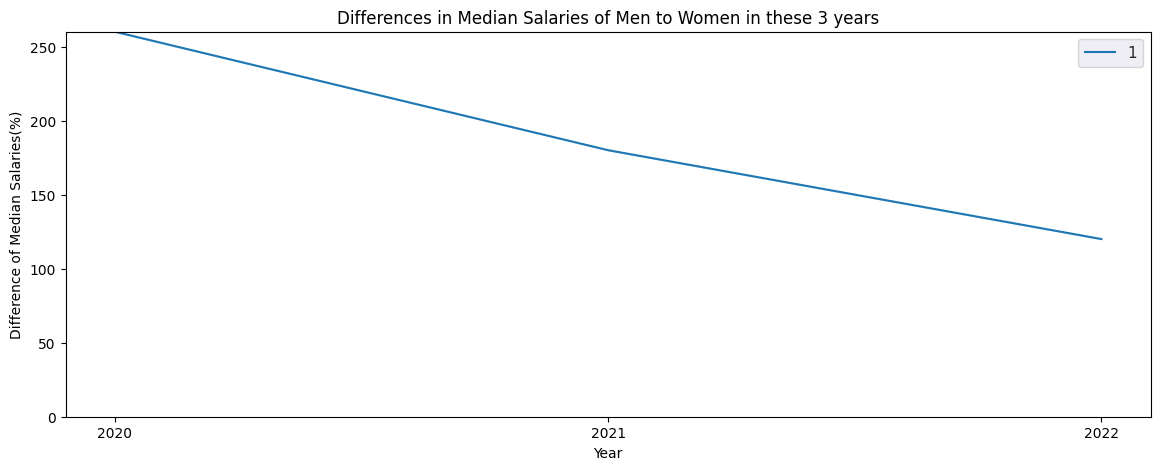

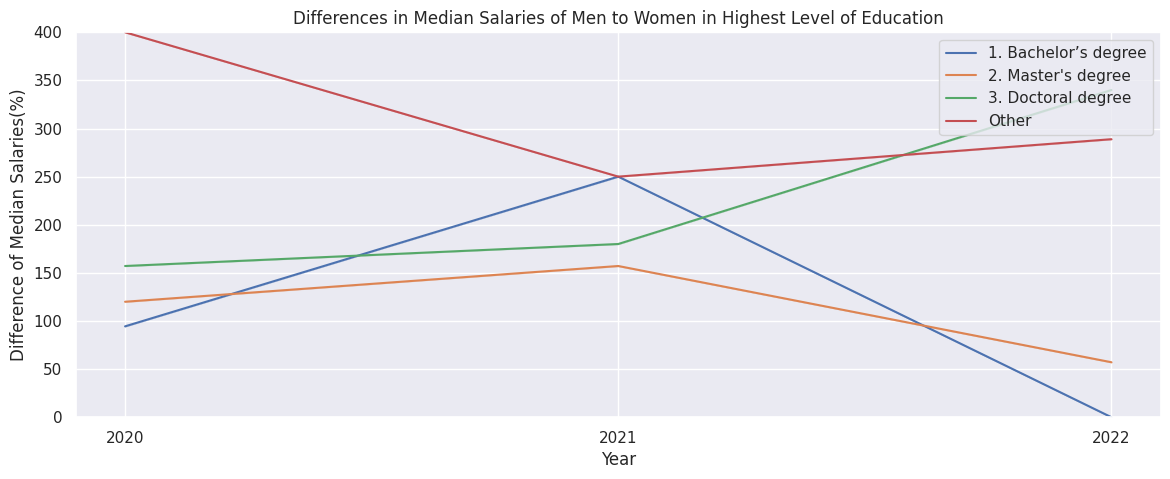

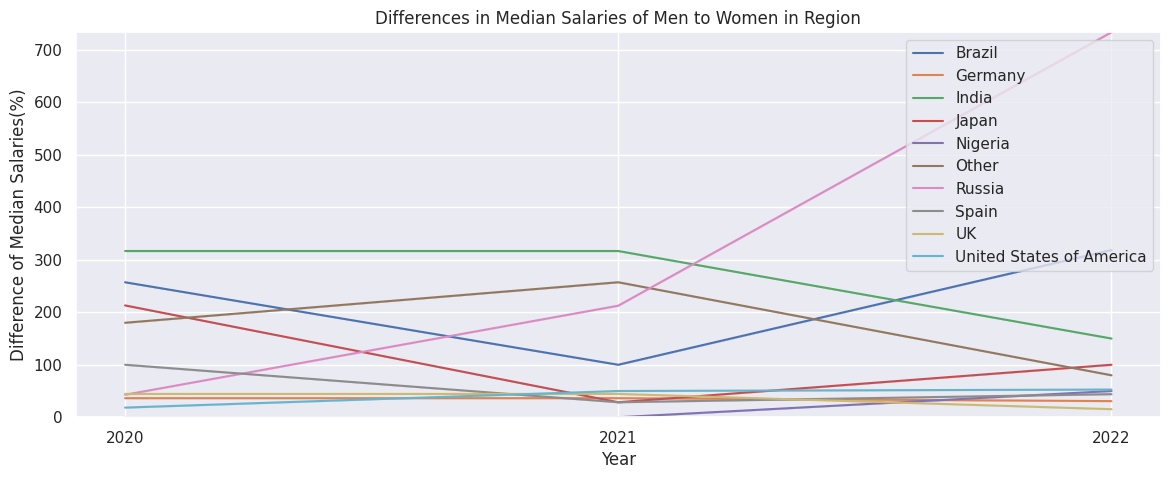

In [ ]:
feature_list = ['all', 'highest_edu_lv','region']
for f in feature_list:
    plt_data = data.copy()
    plot_trend(data = plt_data, feature = f, ylim = None)

### Statistical Tendency

highest_edu_lv


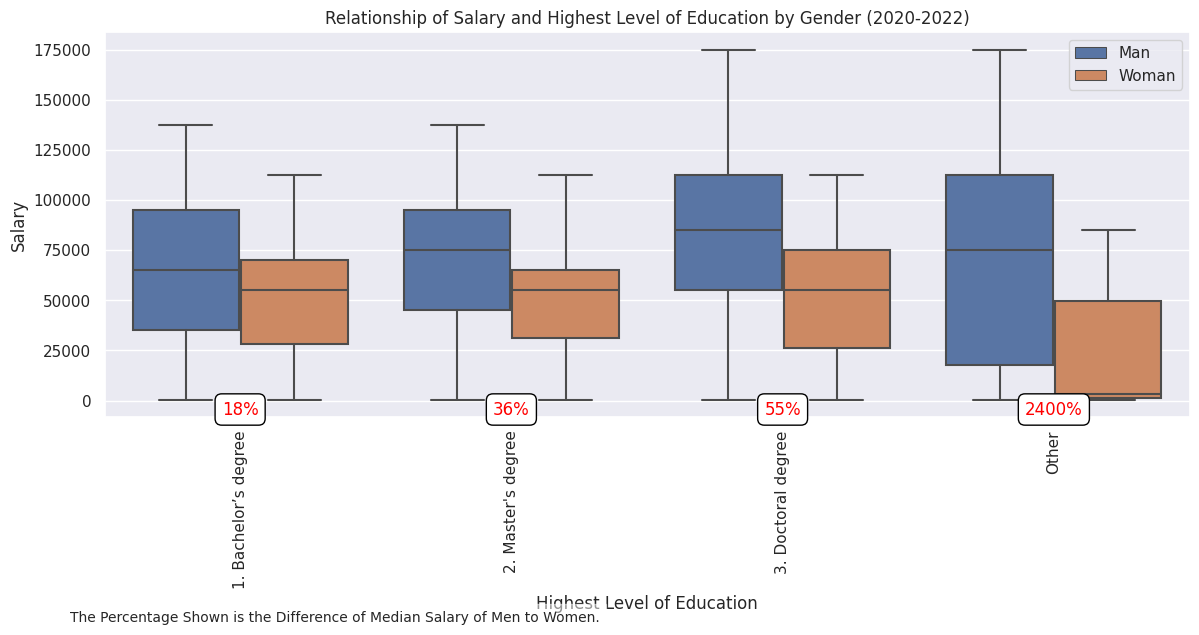

year_of_coding


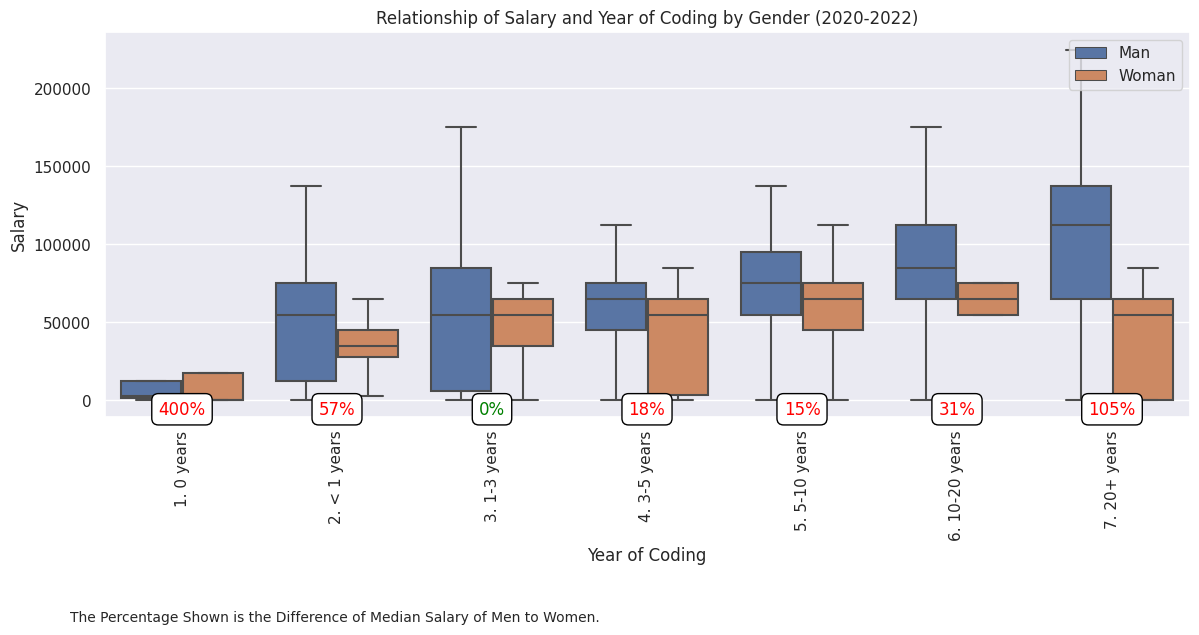

year_of_ml


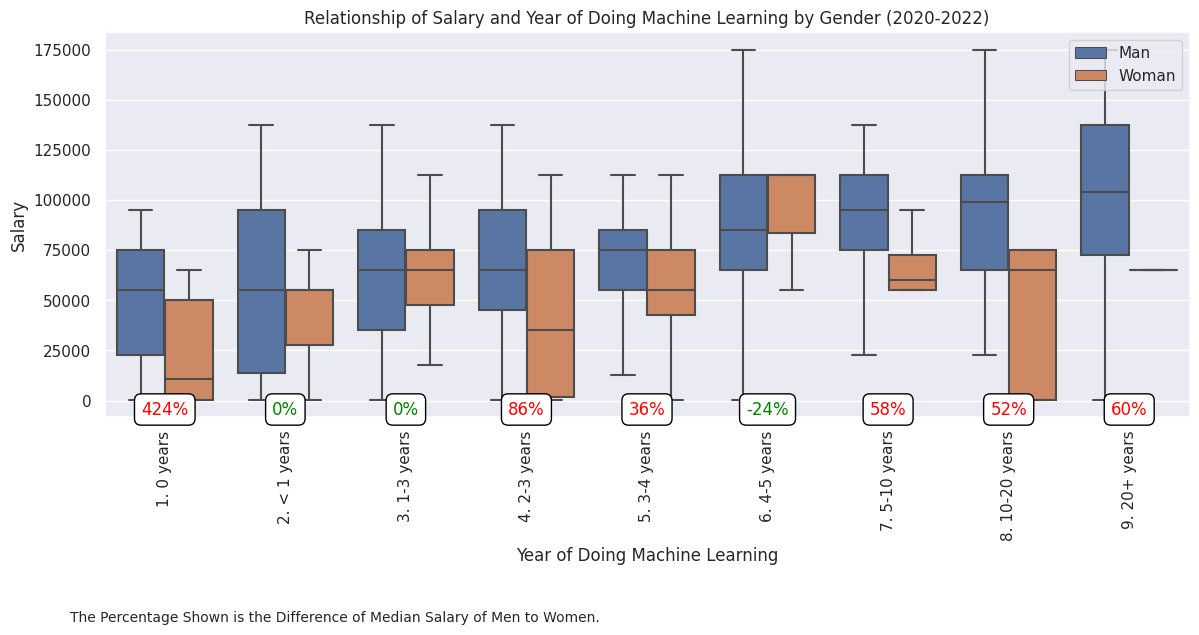

role_title


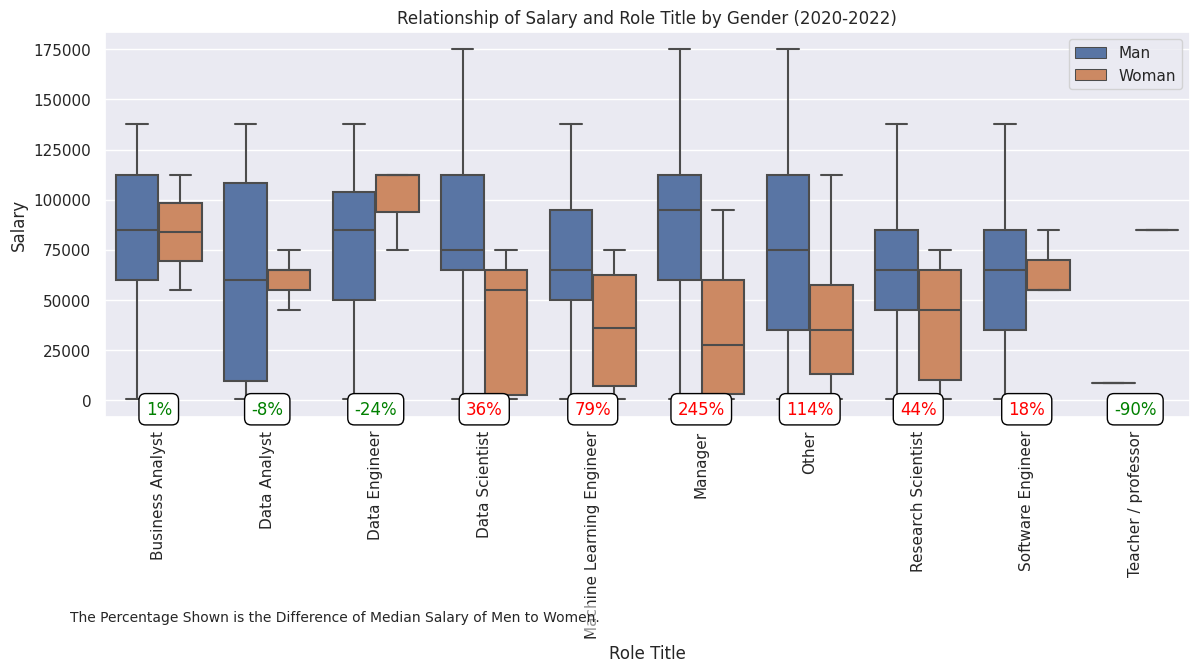

program_language


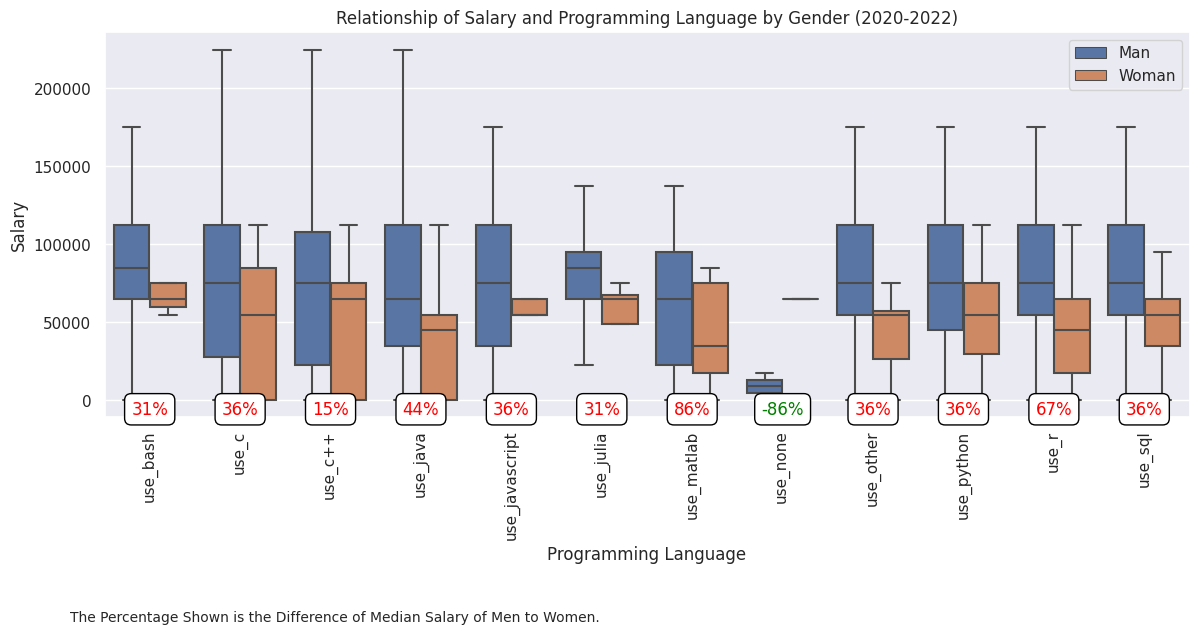

role_activity


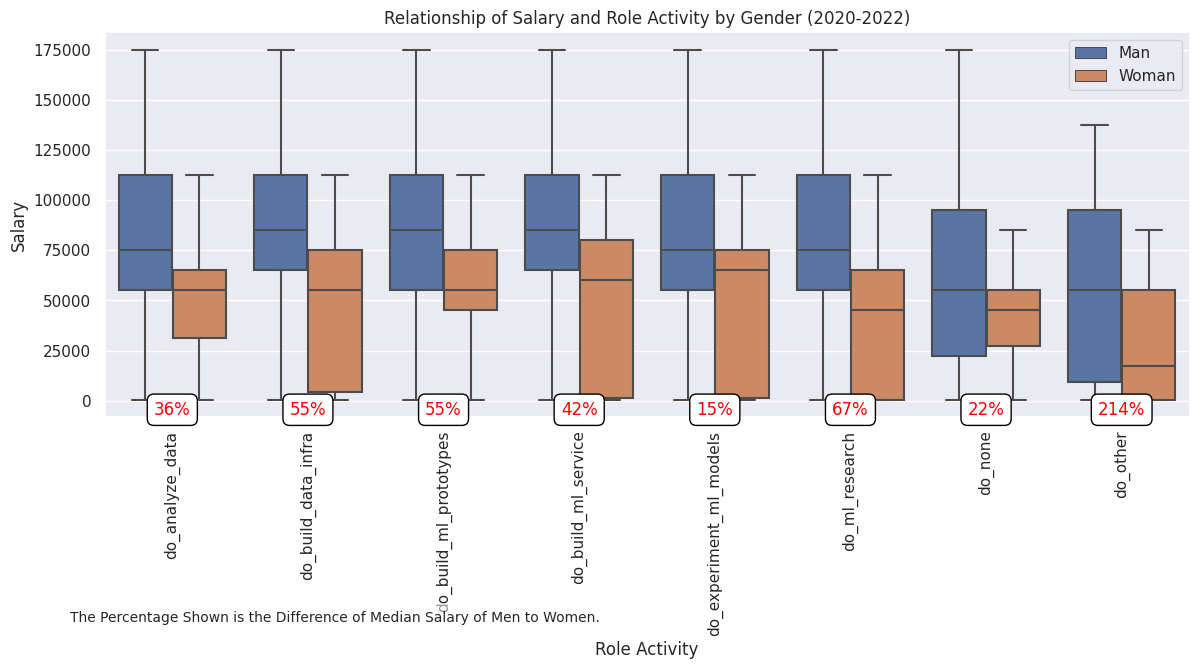

machine_learning_lib


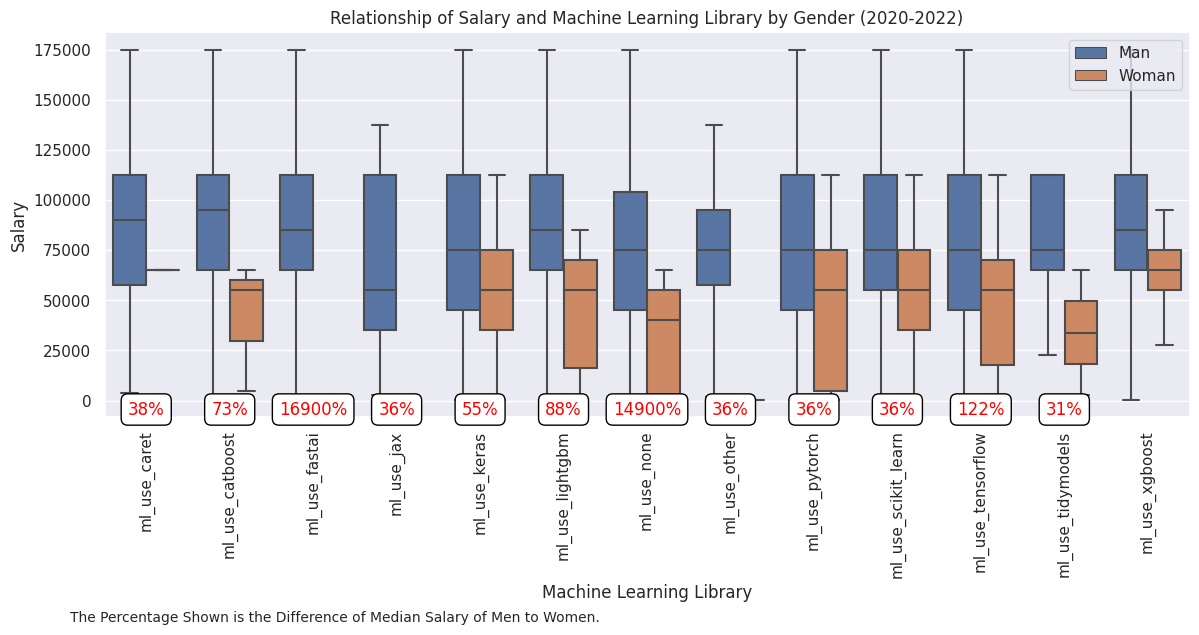

In [ ]:
feature_list = ['highest_edu_lv','year_of_coding', 'year_of_ml', 'role_title', 'program_language', 'role_activity', 'machine_learning_lib']

for f in feature_list:
  print(f)
  if f in ('program_language', 'role_activity', 'machine_learning_lib'):
    plt_data = dummy_to_col(data, f, convert_dict)
  else:
    plt_data = data.copy()
  plt_salary_gender(data = plt_data, feature = f, time_period = '2020-2022', region = 'Germany')

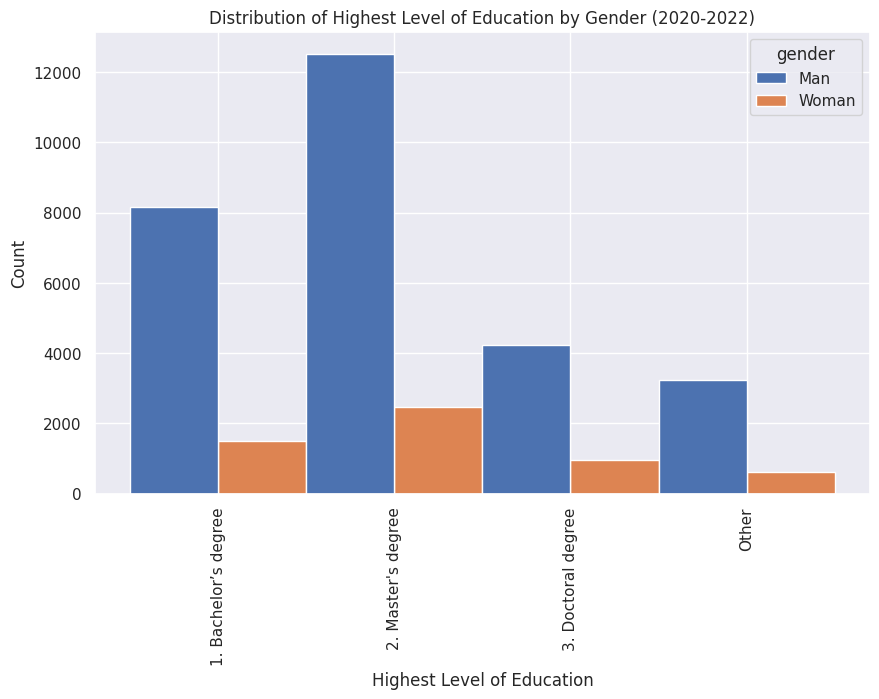

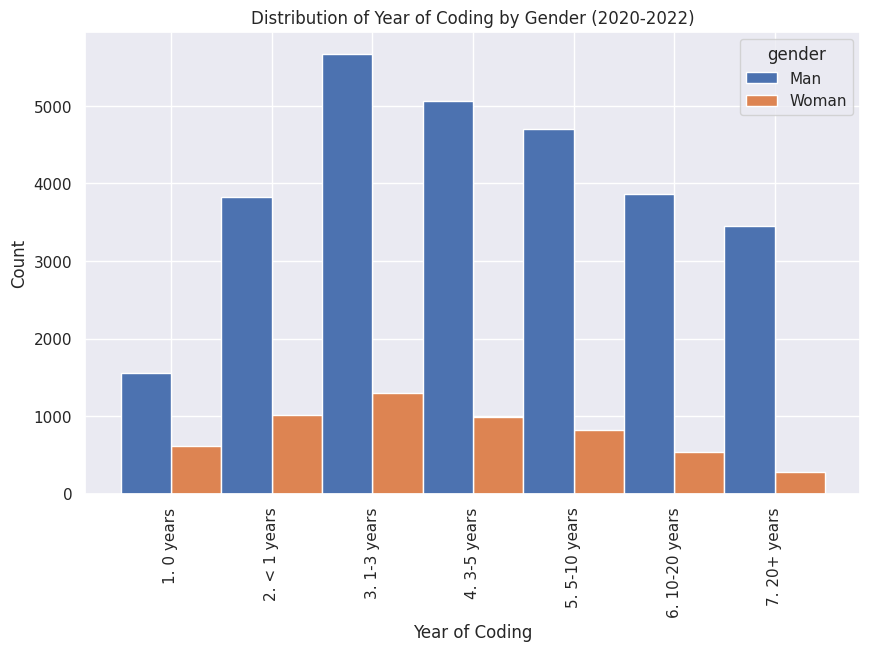

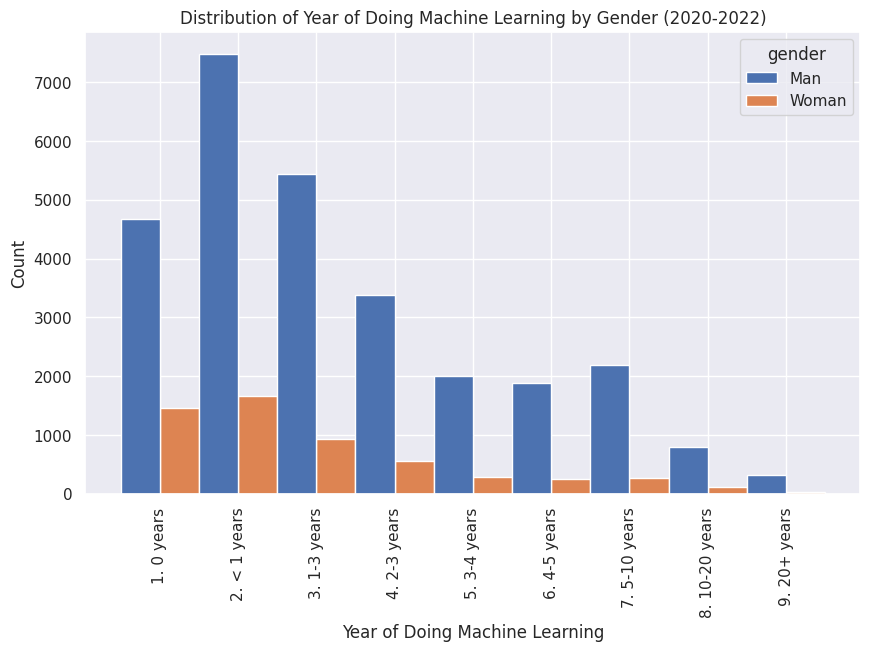

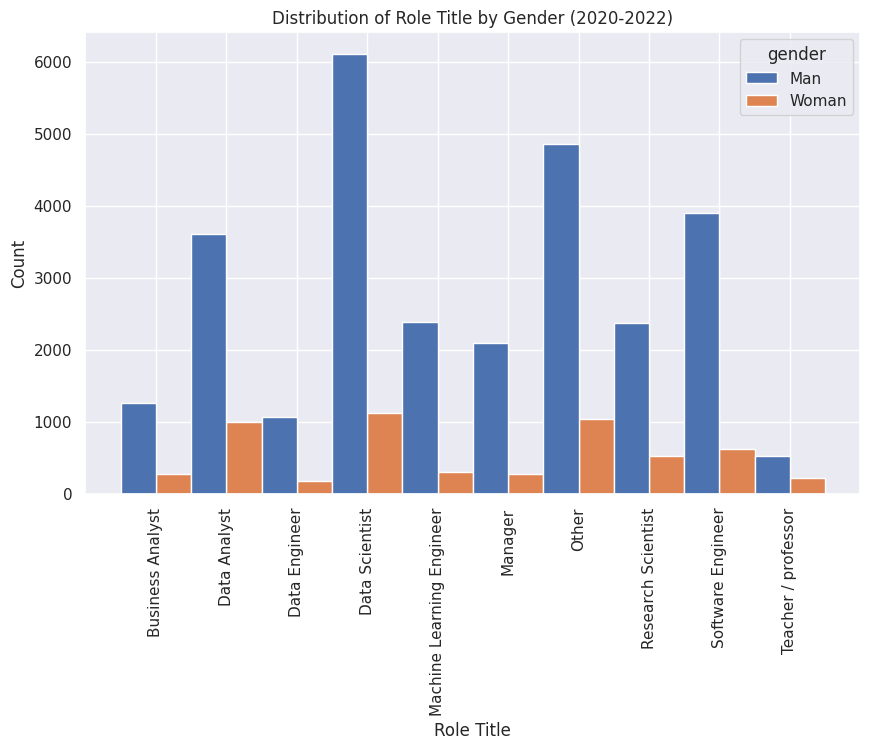

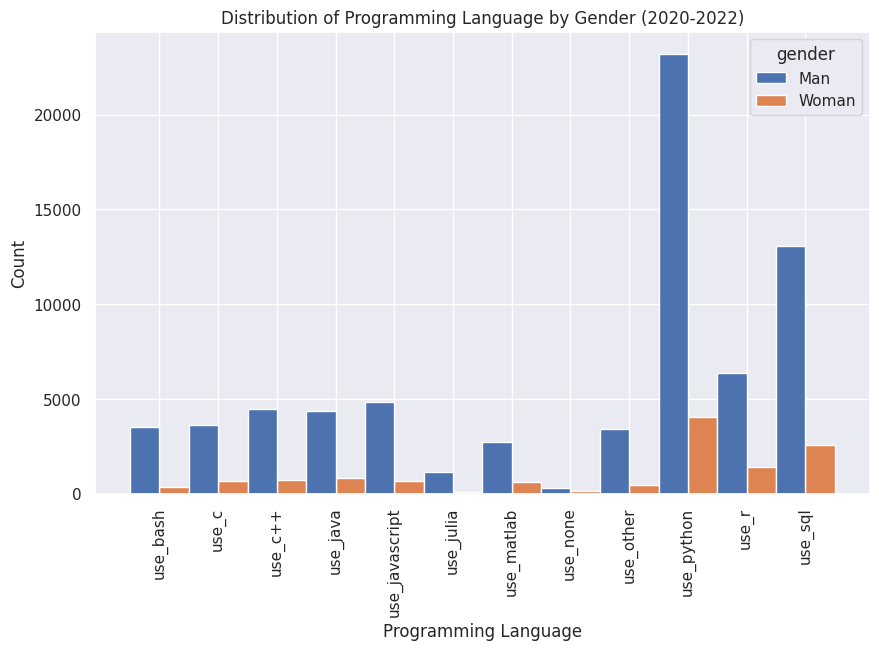

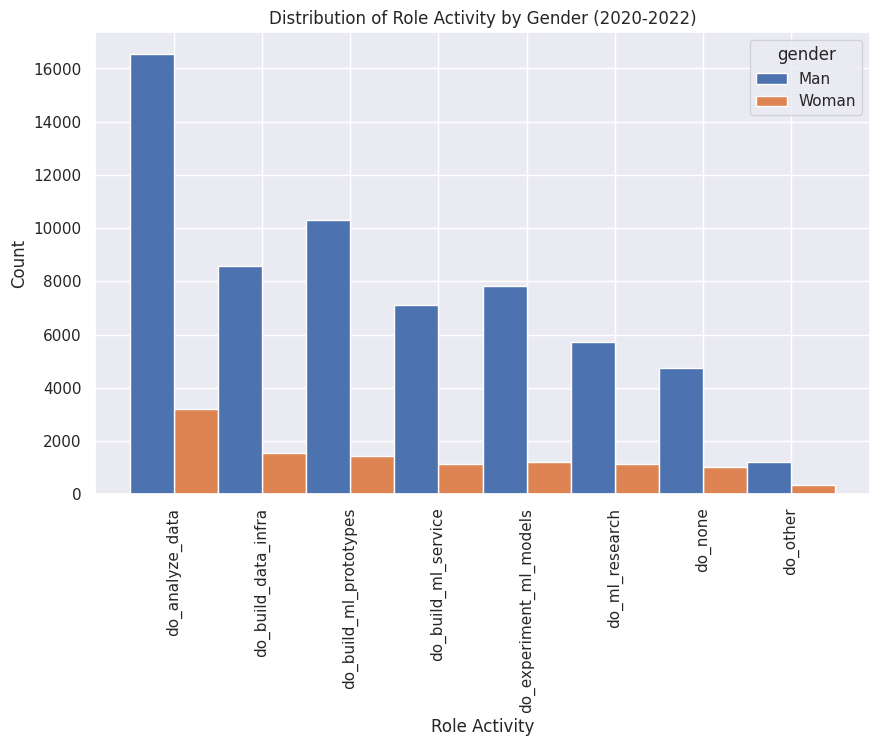

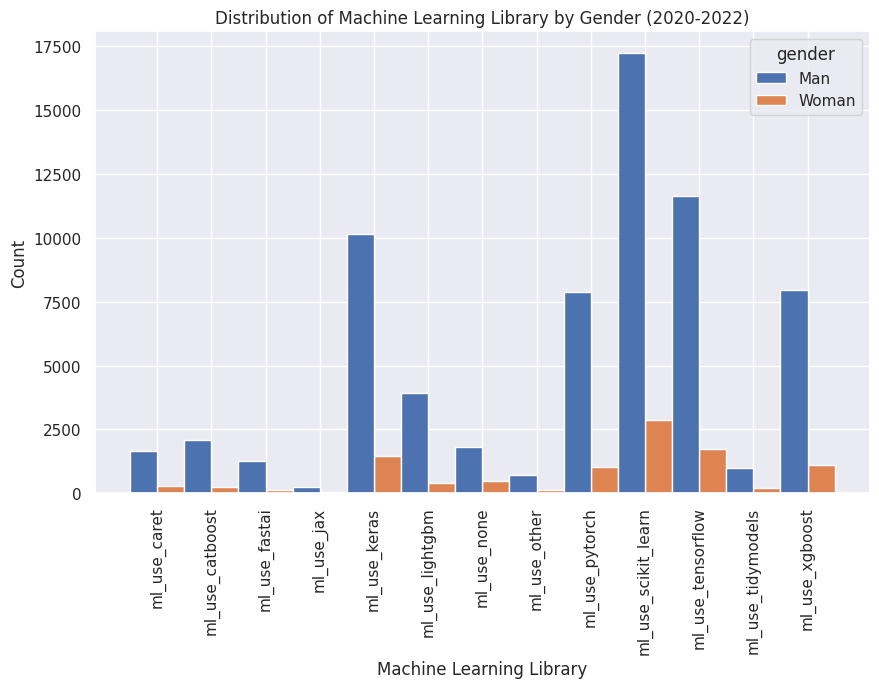

In [ ]:
feature_list = ['highest_edu_lv','year_of_coding', 'year_of_ml', 'role_title', 'program_language', 'role_activity', 'machine_learning_lib']
for f in feature_list:
  if f in ('program_language', 'role_activity', 'machine_learning_lib'):
    plt_data = dummy_to_col(data, f, convert_dict)
  else:
    plt_data = data.copy()
  visualize_survey_data(time_period = '2020-2022', feature = f, data=plt_data, region = None)

### text description: observation

**Observation 1: Gender Pay Gap Trends in the Tech Industry**

1. Global Tech Pay Gap:
   In 2020, the gender pay gap in the tech industry was 250%. By 2022, it decreased to 100%, indicating progress. However, a significant pay gap still remains.

2. Pay Gap Based on Educational Attainment:
   Initially, the gender pay gap increased from 2020 to 2021. Encouragingly, it notably decreased from 2021 to 2022, suggesting progress towards greater pay equity. However, the pay gap has been consistently widening regarding the highest educational achievements.

3. Pay Gap Based on Geographical Location:
   Russia and Brazil witnessed an expanding gender pay gap in the tech industry. However, in other countries, there was a gradual narrowing of the pay gap. This indicates positive results from efforts to address pay disparities, although challenges persist in specific regions.

**Observation 2: Factors Influencing the Gender Pay Gap**

**Highest Level of Education:**

The gender pay gap varies across educational qualifications, with the highest gaps seen among individuals with doctorate and master's degrees. Surprisingly, those with bachelor's degrees have the lowest pay gap, although all educational categories still face a pay gap of over 90% compared to men.

**Year of Coding:**

As coding experience increases, the gender pay gap tends to widen, indicating that experience alone does not mitigate the pay disparity.

**Year of Doing Machine Learning:**

The gender pay gap remains relatively stable over years of machine learning experience, suggesting that expertise in machine learning does not strongly influence the pay gap.

**Role Title:**

Certain role titles such as data scientists, research scientists, software engineers, teachers/professors, and machine learning engineers consistently exhibit higher pay gaps compared to roles like business analysts and data analysts.

**Programming Language:**

The choice of programming language impacts the gender pay gap, with higher gaps observed among individuals using C, JavaScript, MATLAB, Java, and C++. These languages are often associated with software engineering roles, which tend to have higher gender pay gaps.

**Role Activity:**

Roles classified as "others," typically managerial positions with diverse tasks, display the highest gender pay gap within the tech industry.

**Machine Learning Library:**

Professionals using deep learning packages experience a higher gender pay gap, while those utilizing libraries like XGBoost and Scikit-learn encounter smaller gaps. This suggests that among top-tier data scientists and machine learning experts, a significant gender pay gap persists.